In [19]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

### A) experiments with morph. operations

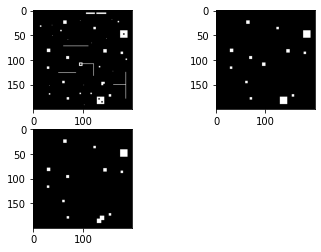

In [20]:
I = cv2.imread("images/mask.png")
I = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)

n = 5
m = 5
SE_1 = np.ones((n,n), np.uint8)
SE_2 = np.ones((m,m), np.uint8)

#close-open
I_dilated2 = cv2.dilate(I, SE_2)
I_eroded2 = cv2.erode(I_dilated2, SE_1)
I_eroded = cv2.erode(I_eroded2, SE_1)
I_dilated = cv2.dilate(I_eroded, SE_2)

#open-close
I_eroded3 = cv2.erode(I, SE_1)
I_dilated3 = cv2.dilate(I_eroded3, SE_2)
I_dilated4 = cv2.dilate(I_dilated3, SE_2)
I_eroded4 = cv2.erode(I_dilated4, SE_1)

plt.subplot(2, 2, 1)
plt.imshow(I, cmap='gray')
plt.subplot(2, 2, 2)
plt.imshow(I_dilated, cmap='gray')
plt.subplot(2, 2, 3)
plt.imshow(I_eroded4, cmap='gray')
plt.show()

**Question:** Based on the results, which order of erosion and dilation operations produces opening and which closing?

If I close two elements, I create one big, so at first I have to joint with dilatation and then return back with erosion

If I open two elements, I separete them, so at first I have to separete with erosion and them return back with dilation

### B) clean the bird image

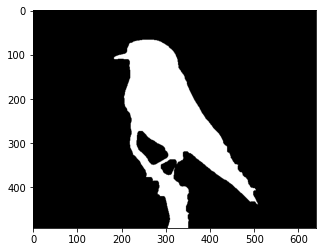

In [21]:
I = cv2.imread('images/bird.jpg')
I = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)
gray_I = cv2.cvtColor(I,cv2.COLOR_RGB2GRAY)

#TODO through Otsu
treshold = 60
mask = np.ndarray((I.shape[0], I.shape[1], 1))
mask[:,:,0] = np.where(gray_I<treshold, 0, 1)
if False: #Otsu is worse
    treshold, mask = cv2.threshold(gray_I, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    print(treshold)

# some morphologics
n = 14
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (n,n))
closing = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

plt.imshow(closing, cmap='gray')
plt.show()

### C) immask

In [22]:
def immask(src, mask):
    output = cv2.bitwise_and(src, src, mask=mask)
    plt.imshow(output)
    plt.show()

### D) eagle mask

otsu threshold is: 125.0


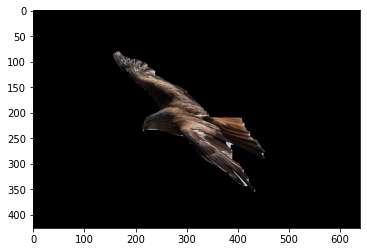

In [23]:
I = cv2.imread('images/eagle.jpg')
I = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)
gray_I = cv2.cvtColor(I,cv2.COLOR_RGB2GRAY)

threshold, I_otsu = cv2.threshold(gray_I, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

n = 10
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (n,n))
mask = cv2.morphologyEx(I_otsu, cv2.MORPH_OPEN, kernel)
mask = cv2.bitwise_not(mask)

print(f'otsu threshold is: {threshold}')
immask(I,mask)

### E) show only small coins

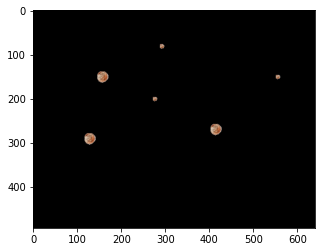

In [24]:
# load picture
I = cv2.imread('images/coins.jpg')
I = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)
gray_I = cv2.cvtColor(I,cv2.COLOR_RGB2GRAY)

# create mask
threshold, I_otsu = cv2.threshold(gray_I, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# do morphologics
n = 10
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (n,n))
mask = cv2.morphologyEx(I_otsu, cv2.MORPH_OPEN, kernel)
mask = cv2.bitwise_not(mask)

# separate components
num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(mask, 8)

#select small coins labels
size_treshold = 700
small_coins = []
for label in range(1, num_labels):
    if stats[label][cv2.CC_STAT_AREA] < size_treshold:
        small_coins.append(label)

#create mask
small_coins_mask = np.isin(labels, small_coins).astype(np.uint8)

immask(I,small_coins_mask)